## Task 6 - Prediction Using Decision Tree Algorithm 

## Author - Sneha B

### Importing the necessary libraries

In [1]:
# Remove warnings
import warnings
warnings.filterwarnings('ignore')

# Data
import pandas as pd
import sklearn.datasets as datasets

# The Model
from sklearn.tree import DecisionTreeClassifier

# Fitting the Model
from sklearn.model_selection import train_test_split

# Graphical Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
import graphviz

In [2]:
iris=datasets.load_iris() # loading the iris dataset from sklearn

### An insight into the dataset

In [3]:
# Reading the data and viewing the first 5 rows
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Removing the Id column
df.drop(columns=['Id'],inplace=True)

In [5]:
print("The shape of the dataset is: ",df.shape)

The shape of the dataset is:  (150, 5)


In [6]:
print("The number of null values is:\n",df.isnull().sum())

The number of null values is:
 SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [7]:
print("The basic information about the data is:\n",df.describe())

The basic information about the data is:
        SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


### Training the Decision Tree Model

In [8]:
X=pd.DataFrame(iris.data,columns=iris.feature_names)
y=pd.DataFrame(iris.target,columns=["species"])
print("X contains:\n",X.head())

X contains:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [9]:
print("y contains:\n",y.head())

y contains:
    species
0        0
1        0
2        0
3        0
4        0


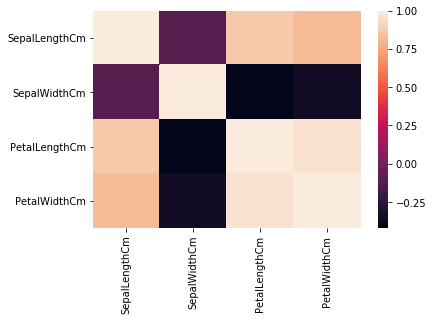

In [10]:
#A heatmap to find the correlation among the different features
corr=df.corr()
sns.heatmap(corr)

In [11]:
# Splitting the dataset into train and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [12]:
clf=DecisionTreeClassifier()# Creating an object of the DecisionTreeClassifier
clf.fit(X_train,y_train)# Fitting the training data
print("The model has been trained.")

The model has been trained.


In [13]:
y_pred=clf.predict(X_test)# Predicting on X_test
print("The predicted values are:\n",y_pred)
print("\nThe actual values are:\n",y_test.values.reshape(-1,45)[0])

The predicted values are:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]

The actual values are:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


### Graphical Visualization

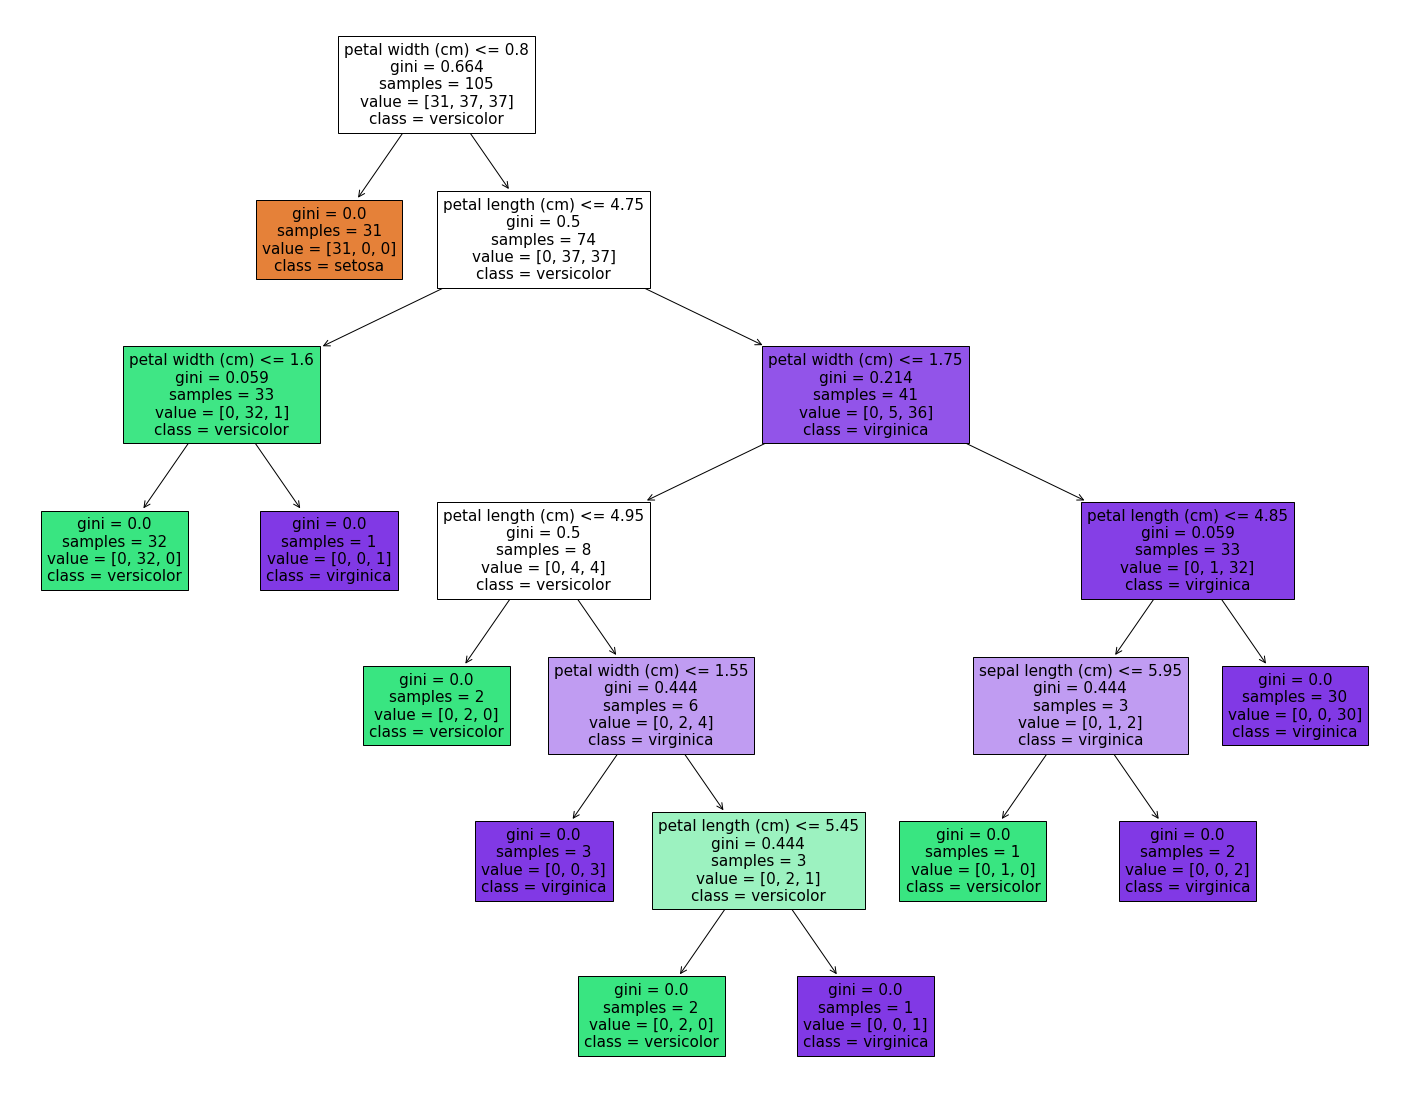

In [14]:
# Method 1: Using plot_tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf, 
               feature_names=iris.feature_names,  
                class_names=iris.target_names,
                filled=True);

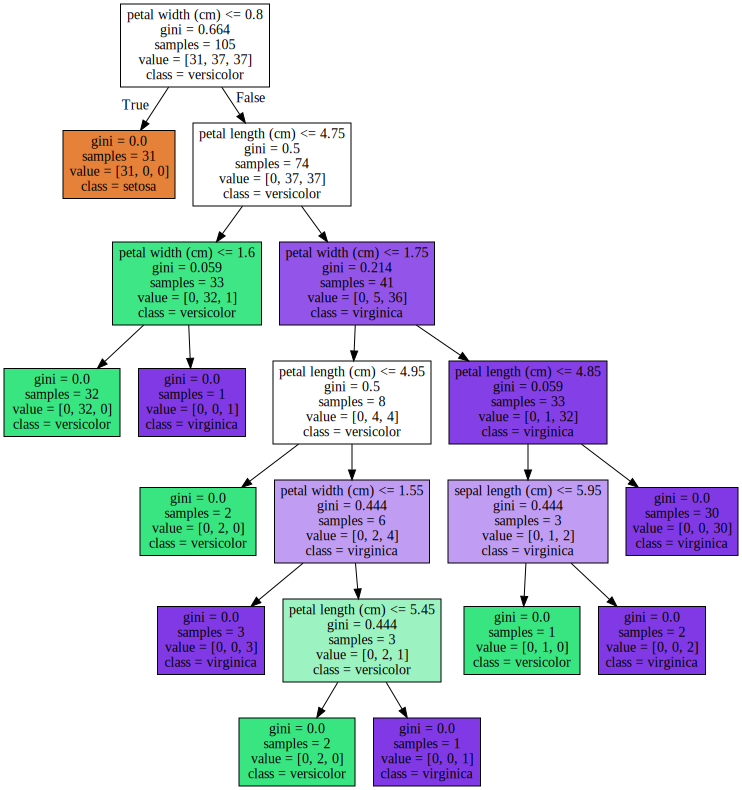

In [15]:
# Method 2: Using graphviz
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names,
                                filled=True)
graph = graphviz.Source(dot_data, format="jpg")  
graph

## Thank You!